In [1]:
import sys
sys.path.insert(1, '..')

In [2]:
from graphviz import Digraph
from IPython.display import display
import ermaket
import graphviz

In [3]:
ERD = '../xml/examples/task_management.xml'

In [4]:
with open(ERD, 'r') as f:
    xml = f.read()
    erd = ermaket.api.erd.ERD(xml)

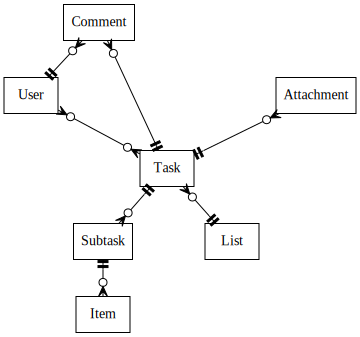

In [8]:
g = Digraph('G', graph_attr={'nodesep': '1'})

def make_entity(g, entity):
    g.node(
        str(entity._id),
        f"{entity.name}",
        shape='record',
        regular='true'
    )
    
def make_entity_full()

def make_rel(g, rel):
    if len(rel) == 2:
        make_binary(g, rel)
        
def get_arrow(side):
    arrow = ''
    if side.is_multiple:
        arrow += 'crow'
    else:
        arrow += 'tee'
    if side.is_mandatory:
        arrow += 'tee'
    else:
        arrow += 'odot'
    return arrow

def make_binary(g, rel):
    g.edge(
        str(rel.sides[0].id_ref), str(rel.sides[1].id_ref),
        dir='both',
        arrowhead=get_arrow(rel.sides[1]),
        arrowtail=get_arrow(rel.sides[0])
    )

for entity in erd.entities.values():
    make_entity(g, entity)
    
for rel in erd.relations:
    make_rel(g, rel)

display(g)

In [6]:
print(g.source)

digraph G {
	graph [nodesep=1 splines=ortho]
	0 [label="User (0)" regular=true shape=record]
	1 [label="Task (1)" regular=true shape=record]
	2 [label="Subtask (2)" regular=true shape=record]
	3 [label="Comment (3)" regular=true shape=record]
	4 [label="List (4)" regular=true shape=record]
	5 [label="Attachment (5)" regular=true shape=record]
	6 [label="Item (6)" regular=true shape=record]
	3 -> 0 [arrowhead=teetee arrowtail=crowodot dir=both]
	0 -> 1 [arrowhead=crowodot arrowtail=crowodot dir=both]
	3 -> 1 [arrowhead=teetee arrowtail=crowodot dir=both]
	1 -> 4 [arrowhead=teetee arrowtail=crowodot dir=both]
	5 -> 1 [arrowhead=teetee arrowtail=crowodot dir=both]
	1 -> 2 [arrowhead=crowodot arrowtail=teetee dir=both]
	2 -> 6 [arrowhead=crowodot arrowtail=teetee dir=both]
}
